# Algorithms for DNA Sequencing - Programming Assignments

The code written in this notebook was created as a programming assignment in the frame of the course "Algorithms for DNA Sequencing" taught by Johns Hopkins University. 

1. How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?  E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [2]:
#import data in FASTA format and read file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            #ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('lambda_virus.fa')

In [3]:
#implementing function that creates reverse complement of DNA strand
def reverseComplement(strand):
    complement = {'A': 'T', 'C': 'G', 'G':'C', 'T': 'A', 'N':'N'}
    reversedna = ''
    for base in strand:
        reversedna = complement[base] + reversedna
    return reversedna

In [4]:
# implementing naive matching algorithm to detect occurrences ot ACGT or complement ACCT in lambda virus genome
def naivematching(p, t):
    occurrences = []
    for i in range(len(t)-len(p) + 1): #loop over alignments
        match = True
        for j in range(len(p)): #loop over characters
            if t[i+j] != p[j]: #compare characters
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [5]:
# finally, counting occurrences in lambda virus genome
count = 0

count = len(naivematching('AGGT',genome))
count += len((naivematching(reverseComplement('AGGT'), genome)))

print(count)




306


2. How many times does 'TTAA' or its reverse complement occur in lambda virus genome?

In [6]:
TTAAcount = len(naivematching('TTAA', genome))
TTAAcount += len(naivematching(reverseComplement('TTAA'), genome))
print(TTAAcount)

390


3. What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the lambda virus genome? 

In [16]:
# finding the offset of the leftmost occurrence with naive matching algorithm
occ1 = naivematching('ACTAAGT', genome)
occ1.extend(naivematching(reverseComplement('ACTAAGT'), genome))
print(min(occ1))
print(occ1)

26028
[27733, 45382, 26028]


4. What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the lambda virus genome?

In [18]:
occ2 = naivematching('AGTCGA', genome)
occ2.extend(naivematching(reverseComplement('AGTCGA'), genome))
print(f'The leftmost occurrence of \'AGTCGA\' is at: {min(occ2)}' )

The leftmost occurrence of 'AGTCGA' is at: 450


5. Finding approximate matches: allow up to 2 mismatches per occurrence. How many times does TTCAAGCC occur in the lambda virus genome when allowing up to 2 mismatches?

In [72]:
# modifying the naivematching function to allow up to two mismatches per occurrence. Reverse complement strand is not included here.
def naivematchingwithtolerance(p,t):
    occurrences = []
    for i in range(len(t)-len(p) + 1): #loop over alignments
        mismatch = 0
        for j in range(len(p)): #loop over characters
            if t[i+j] != p[j]: #compare characters
                mismatch += 1
                if mismatch > 2:
                    break
        if mismatch <= 2:
            occurrences.append(i)
    return occurrences

#testing out the function with sample DNA:

naivematchingwithtolerance('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [22]:
#testing modified function with lambda virus genome:
num_mismatched = len(naivematchingwithtolerance('TTCAAGCC', genome))
print(f'The read \'TTCAAGCC\' does occur {num_mismatched} times.')

The read 'TTCAAGCC' does occur 191 times.


6. What is the offset of the leftmost occurrence of AGGAGGTT in the lambda virus genome when allowing up to 2 mismatches?

In [23]:
occ3 = naivematchingwithtolerance('AGGAGGTT', genome)
print(f'The leftmost occurrence of read \'AGGAGGTT\' is at position {min(occ3)}.')

The leftmost occurrence of read 'AGGAGGTT' is at position 49.


7. Download FASTQ file. Report which read sequence has poor quality.

In [30]:
#parsing the read and quality string from a FASTQ file containing sequencing reads.
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as fq:
        while True:
            fq.readline() #skip name line
            seq = fq.readline().rstrip() # removing trailing whitespace and reading base sequence
            fq.readline() # skip placeholder line
            qual = fq.readline().rstrip() #reading quality information line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

humangenomeseq, humangenomequal = readFastq('ERR037900_1.first1000.fastq')

print(humangenomeseq[:50])


['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNAACCTAACCCTAACCCTAACTCTAACCCTAACC', 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC', 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC

In [27]:
#analysing sequencing quality
def phred33ToQ(qual):
    '''Function takes in quality ASCII read and returns integer.'''
    return ord(qual) - 33

phred33ToQ('H')

39

In [28]:
#plotting distribution of base quality
%matplotlib inline
import matplotlib.pyplot as plt


[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


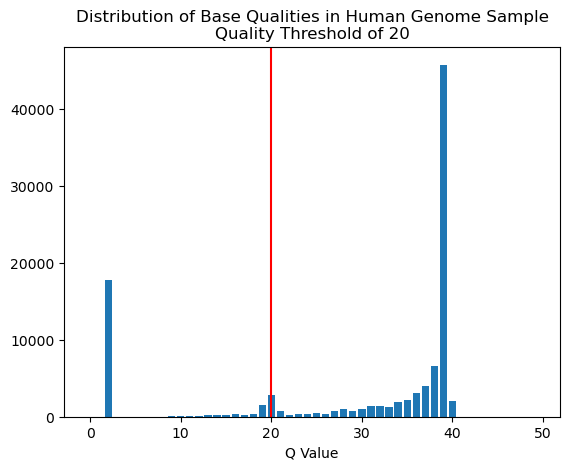

In [39]:
def createhist(genomequal):
    bins = [0]*50
    for qual in genomequal:
        for phred in qual:
            q = phred33ToQ(phred)
            bins[q] += 1
    return bins

qualhist = createhist(humangenomequal)
print(qualhist)

plt.bar(range(len(qualhist)),qualhist)
plt.title('Distribution of Base Qualities in Human Genome Sample\nQuality Threshold of 20')
plt.axvline(x=20, c='red')
plt.xlabel('Q Value')
plt.show()


The histogram indicates that there is a great amount of poor quality reads in the human genome sample. In the next step a function is created that will detect which of the read sequence contains the highest amount of poor quality.

In [33]:
def find_poor_quality_cycle(fastq_file, read_index):
    with open(fastq_file, 'r') as f:
        lines = f.readlines()

    read_lines = lines[read_index * 4 + 2].strip()
    qualities = lines[read_index * 4 + 3].strip()

    for i, quality in enumerate(qualities):
        if ord(quality) - 33 < 20:  # ASCII encoding for quality score, subtract 33 to get Phred quality score, threshold of 20 to indicate poor quality
            return i + 1  # Return 1-based index of sequencing cycle, if zero-based then remove +1

    return None  # If no poor quality cycle is found


read_index = 0  # Index of the read in the FASTQ file
poor_quality_cycle = find_poor_quality_cycle('ERR037900_1.first1000.fastq', read_index)
if poor_quality_cycle is not None:
    print(f"The sequencing cycle with poor quality for read {read_index + 1} is: {poor_quality_cycle}")
else:
    print(f"No poor quality cycle found for read {read_index + 1}")

The sequencing cycle with poor quality for read 1 is: 66


# Programming Assignment Week 2

How many alignments does the naive exact matching algorithm try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

How many character comparisons does the naive exact matching algorithm try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [4]:
chrgenome = readGenome('chr1.GRCh38.excerpt.fasta')

In [17]:
# implementing naive matching algorithm to detect occurrences of pattern in genome
def naivematching(p, t):
    '''exact matching algorithm for detecting exact occurrence of pattern in text'''
    occurrences = []
    alignments = 0
    comparisons = 0
    for i in range(len(t)-len(p) + 1): #loop over alignments
        match = True
        alignments += 1
        for j in range(len(p)): #loop over characters
            comparisons += 1
            if t[i+j] != p[j]: #compare characters
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences, alignments, comparisons

In [18]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
pattern_occurrences, pattern_aligments, pattern_comparisons = naivematching(p, chrgenome)
print(f'The naive exact matching algorithm tries {pattern_aligments} read alignments and {pattern_comparisons} pattern comparisons resulting in {len(pattern_occurrences)} pattern occurrence within the human chromosome.')

The naive exact matching algorithm tries 799954 read alignments and 984143 pattern comparisons resulting in 1 pattern occurrence within the human chromosome.


How many alignments does Boyer-Moore try when matching the string GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

### Boyer Moore Algorithm
- powerful string searching algorithm that efficiently finds pattern occurrences in text
- skips comparisons based on the information gathered in pattern preprocessing step
    - bad character rule: create a table that stores rightmost occurrence of each character in the pattern
    - good suffix rule: stores information about how much we can shift the pattern if a mismatch occurs at a particular position

In [15]:
# The following code contains several functions that preprocess the pattern P and create the tables required to apply the bad character rule and good suffix rule. 
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [27]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    alignments = 0
    while i < len(t) - len(p) + 1:
        alignments += 1
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences, alignments



In [21]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
p_bm = BoyerMoore(p, alphabet='ACGT')

In [28]:
occurrences, alignments = boyer_moore(p, p_bm, chrgenome)
print(f'The Boyer Moore algorithm tries {alignments} alignments when matching the pattern p to the chromosome genome.')

The Boyer Moore algorithm tries 127974 alignments when matching the pattern p to the chromosome genome.


Index-assisted approximate matching. In practicals, we built a Python class called Index implementing an ordered-list version of the k-mer index. Implement the pigeonhole principle using Index to find exact matches for the partitions. Assume P always has length 24, and that we are looking for approximate matches with up to 2 mismatches (substitutions). We will use an 8-mer index. Write a function that, given a length-24 pattern P and given an Index object built on 8-mers, finds all approximate occurrences of P within T with up to 2 mismatches. Insertions and deletions are not allowed. Don't consider any reverse complements.
How many times does the string GGCGCGGTGGCTCACGCCTGTAAT, which is derived from a human Alu sequence, occur with up to 2 substitutions in the excerpt of human chromosome 1?  (Don't consider reverse complements here.)

In [43]:
import bisect

In [60]:
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [61]:
def queryIndex(p, t , index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k:i+len(p)]: #verify that rest of pattern matches
            offsets.append(i)
    return offsets

In [75]:
# partial matching algorithm implementation using an exact matching algorithm (Indexing)
# combined with the pigeon hole principle to allow up to k mismatches of pattern in text
#

def approximate_match_index(p, t, k):
    '''approximate matching algorithm that allows up to k mismatches. Indexing is used to find exact matches combined with the pigeon hole principle to allow up to k mismatches of pattern in text'''
    segment_length = round(len(p) // (k+1))
    hits = 0
    all_matches = set()
    index = Index(t, 8) # built on 8-mers
    for i in range(k+1):
        start = i * segment_length
        end = min((i+1) * segment_length, len(p))
        matches = index.query(p[start:end])
        hits += len(matches)
        for m in matches:
            text_offset = m - start
            if text_offset < 0 or (text_offset + len(p)) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[text_offset + j]:
                    mismatches += 1
                    if mismatches > k:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[text_offset + j]:
                    mismatches += 1
                    if mismatches > k:
                        break
            if mismatches <= k:
                all_matches.add(text_offset)
    return list(all_matches), hits

In [77]:

p = 'GGCGCGGTGGCTCACGCCTGTAAT'
approximate_matches, hits = approximate_match_index(p, chrgenome,2)
print('The index algorithm detects: ' +str(len(approximate_matches)) + ' number of matches. The total number of index hits is: ' + str(hits) + ' when searching for occurrences of the pattern with up to 2 substitutions in the excerpt of human chromosome 1.')
print(len(naivematchingwithtolerance(p, chrgenome)))

The index algorithm detects: 19 number of matches. The total number of index hits is: 90 when searching for occurrences of the pattern with up to 2 substitutions in the excerpt of human chromosome 1.
19


Write a function that, given a length-24 pattern P and given a SubseqIndex object built with k = 8 and ival = 3, finds all approximate occurrences of P within T with up to 2 mismatches. When using this function, how many total index hits are there when searching for GGCGCGGTGGCTCACGCCTGTAAT with up to 2 substitutions in the excerpt of human chromosome 1?  (Again, don't consider reverse complements.)

In [78]:
import bisect
   
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [85]:
def approximate_match_subseqindex(p, t, k):
    '''approximate matching algorithm that allows up to k mismatches. Indexing is used to find exact matches combined with the pigeon hole principle to allow up to k mismatches of pattern in text'''
    segment_length = round(len(p) // (k+1))
    hits = 0
    all_matches = set()
    index = SubseqIndex(t, 8, 3) # built on 8-mers
    for start in range(k+1):
        matches = index.query(p[start:])
        hits += len(matches)
        for m in matches:
            text_offset = m - start
            if text_offset < 0 or (text_offset + len(p)) > len(t):
                continue
            mismatches = 0
            for j in range(0, len(p)):
                if not p[j] == t[text_offset + j]:
                    mismatches += 1
                    if mismatches > k:
                        break
            if mismatches <= k:
                all_matches.add(text_offset)
    return list(all_matches), hits

In [86]:
p = 'GGCGCGGTGGCTCACGCCTGTAAT'
all_m, hits = approximate_match_subseqindex(p, chrgenome, 2)
print(f'The total number of hits are: {hits}.')

The total number of hits are: 79.


# Week 3 Programming Assignment

## Edit Distance, Assembly, Overlap

What is the edit distance of the best match between pattern GCTGATCGATCGTACG and the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [2]:
# reading and parsing the fasta file containing an excerpt of human chromosome 1
human_chromosome1 = readGenome('chr1.GRCh38.excerpt.fasta')
print(human_chromosome1[:20])

TTGAATGCTGAAATCAGCAG


In [24]:
def editDistance(p, t):
    '''This function computes the edit distance. The edit distance is a measure of similarity between two strings, defined as the minimum number of 
    operations required to transform one string into the other. The allowed operations are insertion, deletion
    or substitution of a single character.'''
    # Create distance matrix D
    m, n = len(p), len(t)
    D = [[0 for j in range(n+1)] for i in range(m+1)] # distancematrix is initialized with zeros; j = column, i = row
    # Initialize first row and column of matrix
    for i in range(m+1):
        D[i][0] = i # first [] = row, second [] = column
    #for i in range(len(y)+1):
       # D[0][i] = i
    # Fill in the rest of the matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            D[i][j] = min(
               D[i][j-1] + 1, #horizontal, represents cost of insertion
               D[i-1][j] + 1, #vertical, represents cost of deletion
               D[i-1][j-1] + int(p[i-1] != t[j-1]) #represents cost of substitution, if the characters at the corresponding positions are not equal this evaluates
                                                    # to True which equals 1 when cast as int, then edit is required and increases cost by 1
            )
    return min(D[m]) # returns minimum value in the last row of distancematrix which represents minimum edit distance

In [26]:
#testing out the function
p = "GCGTATGC"
t = "TATTGGCTATACGGTT"
print(editDistance(p, t))

2


In [27]:
print(editDistance('GCTGATCGATCGTACG', human_chromosome1))

3


What is the edit distance of the best match between pattern GATTTACCAGATTGAG and the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [28]:
p = 'GATTTACCAGATTGAG'
print(f'The edit distance between the pattern: GATTTACCAGATTGAG and the excerpt of human chromosome 1 is: {editDistance(p, human_chromosome1)}')

The edit distance between the pattern: GATTTACCAGATTGAG and the excerpt of human chromosome 1 is: 2


### Overlap

Next, find all pairs of reads with an exact suffix/prefix match of length at least 30. Don't overlap a read with itself; if a read has a suffix/prefix match to itself, ignore that match.  Ignore reverse complements.
Here is a suggestion for how to implement this idea.  You don't have to do it this way, but this might help you.  Let every k-mer in the dataset have an associated set object, which starts out empty.  We use a 
Python dictionary to associate each k-mer with its corresponding set. For every k-mer in a read, we add the read to the set corresponding to that k-mer.  If our read is GATTA and k=3, we would add GATTA to the set for GAT, ATT and TTA.  We do this for every read so that, at the end, each set contains all reads containing the corresponding k-mer. Now, for each read a, we find all overlaps involving a suffix of a.  To do this, we take a's length-k suffix, find all reads containing that k-mer (obtained from the corresponding set) and call overlap(a, b, min_length=k) for each.

In [39]:
def overlap(a, b, k):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:k], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [35]:
def overlap_all_pairs(reads, k, map={}):
    def get_kmers(read, k):
        res = set()
        for i in range(0, len(read)-k+1):
            res.add(read[i:i+k])
        return res
    for read in reads:
        kmers = get_kmers(read, k)
        for kmer in kmers:
            if not kmer in map.keys():
                map[kmer] = set()
            map[kmer].add(read)
    pairs = []
    for head in reads:
        kmer = head[-k:]
        candidates = map[kmer]
        for tail in candidates:
            if (not head == tail and overlap(head, tail, k)):
                pairs.append((head, tail))
    return pairs

In [36]:
reads, _ = readFastq('ERR266411_1.for_asm.fastq')

In [40]:
pairs = overlap_all_pairs(reads, 30)
print(len(pairs))

904746


Picture the overlap graph corresponding to the overlaps computed for the previous question. How many nodes in this graph have at least one outgoing edge?  (In other words, how many reads have a suffix involved in an overlap?)

In [41]:
print(len(set(pair[0] for pair in pairs)))

7161


# Week 4 Programming Assignment

What is the length of the shortest common superstring of the following strings? CCT, CTT,TGC, TGG, GAT, ATT

In [47]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given
        strings, which must be the same length """
    shortest_sup = None
    variations = 0
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], k=1)
            # add non-overlapping portion of B to superstring
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup  # found shorter superstring
            variations = 1
        elif len(shortest_sup) == len(sup):
            variations += 1
    return shortest_sup, variations  # return shortest

In [49]:
shortest_common_superstring, variations = scs(['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT'])
print(len(shortest_common_superstring))
print(variations)

11
4


Assemble these reads using one of the approaches discussed, such as greedy shortest common superstring.  Since there are many reads, you might consider ways to make the algorithm faster, such as the one discussed in the programming assignment in the previous module.

How many As are there in the full, assembled genome?

Hint: the virus genome you are assembling is exactly 15,894 bases long.

In [51]:
reads, _ = readFastq('ads1_week4_reads.fq')
print(reads[:10])

['GTCCAGCAGAGCAAGTGATGCGAGAGCTGCCCATCCTCCAACCAGCATGCCCCTAGACATTGACACTGCATCGGAGTCAGGCCAAGATCCGCAGGACAGT', 'GGAGTACGACTTCAGAGATCTCACTTGGTGTATCAACCCGCCAGAGAGAATCAAATTGGATTATGATCAATACTGTGCAGATGTGGCTGCTGAAGAACTC', 'GCAAATTTTGATCTCTCTTGGCTTCACAATCAATTCAACCATGACCCGAGATGTAGTCATACCCCTCCTCACAAACAACGATCTCTTAATAAGGATGGCA', 'GAGTTAATTGAAGCCCTAGATTACATTTTCATAACTGATGACATACATCTGACAGGGGAGATTTTCTCATTTTTCAGAAGTTTCGGCCACCCCAGACTTG', 'AATGACAGAGACCGCTATGACCATTGATGCTAGGTATGCAGAACTTCTAGGAAGAGTCAGATACATGTGGAAACTGATAGATGGTTTCTTCCCTGCACTC', 'TACGATTTCGACAAGTCGGCATGGGACATCAAAGGGTCGATCGCTCCGATACAACCTACCACCTACAGTGATGGCAGGCTGGTGCCCCAGGTCAGAGTCA', 'AGAGGAGGCAGGCAGTTCGGGTCTCAGCAAACCATGCCTCTCAGCAATTGGATCAACTGAAGGCGGTGCACCTCGCATCCGCGGTCAGGGATCTGGAGAA', 'CTCTCATCTCACAGAGGTGTTATCGCTGACAATCAAGCAAAATGGGCTGTCCCGACAACACGGACAGATGACAAGTTGCGAATGGAGACATGCTTCCAGC', 'GTCAGGTTAATTGGAAACCCGGATGTGAGCGGGCCCAAACTAACAGGGGCACTAATAGGTATATTATCCTTATTTGTGGAGTCTCCAGGTCAATTGATTC', 'CTAACACGGTATTACATCTTCACGTCGAAACAGATTGTTGCGTGATCCCGATGATAGATCAT

In [52]:
# De Bruijn Algorithm for de novo assembly visualization
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [53]:
# greedy algorithm for the shortest common superstring problem
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, k=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [55]:
%%time
greedy_scs(reads, 30)

CPU times: total: 18min
Wall time: 18min 14s


'ACCAAACAAAGTTGGGTAAGGATAGATCAATCAATGATCATATTCTAGTACACTTAGGATTCAAGATCCTATTATCAGGGACAAGAGCAGGATTAGGGATATCCGAGATGGCCACACTTTTGAGGAGCTTAGCATTGTTCAAAAGAAACAAGGACAAACCACCCATTACATCAGGATCCGGTGGAGCCATCAGAGGAATCAAACACATTATTATAGTACCAATTCCTGGAGATTCCTCAATTACCACTCGATCCAGACTACTGGACCGGTTGGTCAGGTTAATTGGAAACCCGGATGTGAGCGGGCCCAAACTAACAGGGGCACTAATAGGTATATTATCCTTATTTGTGGAGTCTCCAGGTCAATTGATTCAGAGGATCACCGATGACCCTGACGTTAGCATCAGGCTGTTAGAGGTTGTTCAGAGTGACCAGTCACAATCTGGCCTTACCTTCGCATCAAGAGGTACCAACATGGAGGATGAGGCGGACCAATACTTTTCACATGATGATCCAAGCAGTAGTGATCAATCCAGGTCCGGATGGTTCGAGAACAAGGAAATCTCAGATATTGAAGTGCAAGACCCTGAGGGATTCAACATGATTCTGGGTACCATTCTAGCCCAGATCTGGGTCTTGCTCGCAAAGGCGGTTACGGCCCCAGACACGGCAGCTGATTCGGAGCTAAGAAGGTGGATAAAGTACACCCAACAAAGAAGGGTAGTTGGTGAATTTAGATTGGAGAGAAAATGGTTGGATGTGGTGAGGAACAGGATTGCCGAGGACCTCTCTTTACGCCGATTCATGGTGGCTCTAATCCTGGATATCAAGAGGACACCCGGGAACAAACCTAGGATTGCTGAAATGATATGTGACATTGATACATATATCGTAGAGGCAGGATTAGCCAGTTTTATCCTGACTATTAAGTTTGGGATAGAAACTATGTATCCTGCTCTTGGACTGCATGAATTTGCTGGTGAGTTATCCACACTTGAGT

In [56]:
mystery_genome = 'ACCAAACAAAGTTGGGTAAGGATAGATCAATCAATGATCATATTCTAGTACACTTAGGATTCAAGATCCTATTATCAGGGACAAGAGCAGGATTAGGGATATCCGAGATGGCCACACTTTTGAGGAGCTTAGCATTGTTCAAAAGAAACAAGGACAAACCACCCATTACATCAGGATCCGGTGGAGCCATCAGAGGAATCAAACACATTATTATAGTACCAATTCCTGGAGATTCCTCAATTACCACTCGATCCAGACTACTGGACCGGTTGGTCAGGTTAATTGGAAACCCGGATGTGAGCGGGCCCAAACTAACAGGGGCACTAATAGGTATATTATCCTTATTTGTGGAGTCTCCAGGTCAATTGATTCAGAGGATCACCGATGACCCTGACGTTAGCATCAGGCTGTTAGAGGTTGTTCAGAGTGACCAGTCACAATCTGGCCTTACCTTCGCATCAAGAGGTACCAACATGGAGGATGAGGCGGACCAATACTTTTCACATGATGATCCAAGCAGTAGTGATCAATCCAGGTCCGGATGGTTCGAGAACAAGGAAATCTCAGATATTGAAGTGCAAGACCCTGAGGGATTCAACATGATTCTGGGTACCATTCTAGCCCAGATCTGGGTCTTGCTCGCAAAGGCGGTTACGGCCCCAGACACGGCAGCTGATTCGGAGCTAAGAAGGTGGATAAAGTACACCCAACAAAGAAGGGTAGTTGGTGAATTTAGATTGGAGAGAAAATGGTTGGATGTGGTGAGGAACAGGATTGCCGAGGACCTCTCTTTACGCCGATTCATGGTGGCTCTAATCCTGGATATCAAGAGGACACCCGGGAACAAACCTAGGATTGCTGAAATGATATGTGACATTGATACATATATCGTAGAGGCAGGATTAGCCAGTTTTATCCTGACTATTAAGTTTGGGATAGAAACTATGTATCCTGCTCTTGGACTGCATGAATTTGCTGGTGAGTTATCCACACTTGAGTCCTTGATGAATCTTTACCAGCAAATGGGAGAAACTGCACCCTACATGGTAATCCTAGAGAACTCAATTCAGAACAAGTTCAGTGCAGGATCATACCCTCTGCTCTGGAGCTATGCCATGGGAGTAGGAGTGGAACTTGAAAACTCCATGGGAGGTTTGAACTTTGGTCGATCTTACTTTGATCCAGCATATTTTAGATTAGGGCAAGAGATGGTGAGGAGGTCAGCTGGAAAGGTCAGTTCCACATTGGCATCCGAACTCGGTATCACTGCCGAGGATGCAAGGCTTGTTTCAGAGATTGCAATGCATACTACTGAGGACAGGATCAGTAGAGCGGTCGGACCCAGACAAGCCCAAGTGTCATTTCTACACGGTGATCAAAGTGAGAATGAGCTACCAGGATTGGGGGGCAAGGAAGATAGGAGGGTCAAACAGGGTCGGGGAGAAGCCAGGGAGAGCTACAGAGAAACCGGGTCCAGCAGAGCAAGTGATGCGAGAGCTGCCCATCCTCCAACCAGCATGCCCCTAGACATTGACACTGCATCGGAGTCAGGCCAAGATCCGCAGGACAGTCGAAGGTCAGCTGACGCCCTGCTCAGGCTGCAAGCCATGGCAGGAATCTTGGAAGAACAAGGCTCAGACACGGACACCCCTAGGGTATACAATGACAGAGATCTTCTAGACTAGGTGCGAGAGGCCGAGGACCAGAACAACATCCGCCTACCCTCCATCATTGTTATAAAAAACTTAGGAACCAGGTCCACACAGCCGCCAGCCAACCAACCATCCACTCCCACGACTGGAGCCGATGGCAGAAGAGCAGGCACGCCATGTCAAAAACGGACTGGAATGCATCCGGGCTCTCAAGGCCGAGCCCATCGGCTCACTGGCCGTCGAGGAAGCCATGGCAGCATGGTCAGAAATATCAGACAACCCAGGACAGGACCGAGCCACCTGCAAGGAAGAGGAGGCAGGCAGTTCGGGTCTCAGCAAACCATGCCTCTCAGCAATTGGATCAACTGAAGGCGGTGCACCTCGCATCCGCGGTCAGGGATCTGGAGAAAGCGATGACGACGCTGAAACTTTGGGAATCCCCTCAAGAAATCTCCAGGCATCAAGCACTGGGTTACAGTGTTATCATGTTTATGATCACAGCGGTGAAGCGGTTAAGGGAATCCAAGATGCTGACTCTATCATGGTTCAATCAGGCCTTGATGGTGATAGCACCCTCTCAGGAGGAGACGATGAATCTGAAAACAGCGATGTGGATATTGGCGAACCTGATACCGAGGGATATGCTATCACTGACCGGGGATCTGCTCCCATCTCTATGGGGTTCAGGGCTTCTGATGTTGAAACTGCAGAAGGAGGGGAGATCCACGAGCTCCTGAAACTCCAATCCAGAGGCAACAACTTTCCGAAGCTTGGGAAAACTCTCAATGTTCCTCCGCCCCCGAACCCCAGTAGGGCCAGCACTTCCGAGACACCCATTAAAAAGGGCACAGACGCGAGATTGGCCTCATTTGGAACGGAGATCGCGTCTTTATTGACAGGTGGTGCAACCCAATGTGCTCGAAAGTCACCCTCGGAACCATCAGGGCCAGGTGCACCTGCGGGGAATGTCCCCGAGTGTGTGAGCAATGCCGCACTGATACAGGAGTGGACACCCGAATCTGGTACCACAATCTCCCCGAGATCCCAGAATAATGAAGAAGGGGGAGACTATTATGATGATGAGCTGTTCTCCGATGTCCAAGACATCAAAACAGCCTTGGCCAAAATACACGAGGATAATCAGAAGATAATCTCCAAGCTAGAATCATTGCTGTTATTGAAGGGAGAAGTTGAGTCAATTAAGAAGCAGATCAACAGGCAAAATATCAGCATATCCACCCTGGAAGGACACCTCTCAAGCATCATGATTGCCATTCCTGGACTTGGGAAGGATCCCAACGACCCCACTGCAGATGTCGAACTCAATCCCGACCTGAAACCCATCATAGGCAGAGATTCAGGCCGAGCACTGGCCGAAGTTCTCAAGAAGCCCGTTGCCAGCCGACAACTCCAGGGAATGACTAATGGACGGACCAGTTCCAGAGGACAGCTGCTGAAGGAATTTCAACTAAAGCCGATCGGGAAAAAGGTGAGCTCAGCCGTCGGGTTTGTTCCTGACACCGGCCCTGCATCACGCAGTGTAATCCGCTCCATTATAAAATCCAGCCGGCTAGAGGAGGATCGGAAGCGTTACCTGATGACTCTCCTTGATGATATCAAAGGAGCCAACGATCTTGCCAAGTTCCACCAGATGCTGATGAAGATAATAATGAAGTAGCTACAGCTCAACTTACCTGCCAACCCCATGCCAGTCGACCTAATTAGTACAACCTAAATCCATTATAAAAAACTTAGGAGCAAAGTGATTGCCTCCTAAGTTCCACAATGACAGAGATCTACGATTTCGACAAGTCGGCATGGGACATCAAAGGGTCGATCGCTCCGATACAACCTACCACCTACAGTGATGGCAGGCTGGTGCCCCAGGTCAGAGTCATAGATCCTGGTCTAGGTGATAGGAAGGATGAATGCTTTATGTACATGTTTCTGCTGGGGGTTGTTGAGGACAGCGATCCCCTAGGGCCTCCAATCGGGCGAGCATTCGGGTCCCTGCCCTTAGGTGTTGGTAGATCCACAGCAAAACCCGAGGAACTCCTCAAAGAGGCCACTGAGCTTGACATAGTTGTTAGACGTACAGCAGGGCTCAATGAAAAACTGGTGTTCTACAACAACACCCCACTAACCCTCCTCACACCTTGGAGAAAGGTCCTAACAACAGGGAGTGTCTTCAATGCAAACCAAGTGTGCAATGCGGTTAATCTAATACCGCTGGACACCCCGCAGAGGTTCCGTGTTGTTTATATGAGCATCACCCGTCTTTCGGATAACGGGTATTACACCGTTCCCAGAAGAATGCTGGAATTCAGATCGGTCAATGCAGTGGCCTTCAACCTGCTAGTGACCCTTAGGATTGACAAGGCGATTGGCCCTGGGAAGATCATCGACAATGCAGAGCAACTTCCTGAGGCAACATTTATGGTCCACATCGGGAACTTCAGGAGAAAGAAGAGTGAAGTCTACTCTGCCGATTATTGCAAAATGAAAATCGAAAAGATGGGCCTGGTTTTTGCACTTGGTGGGATAGGGGGCACCAGTCTTCACATTAGAAGCACAGGCAAAATGAGCAAGACTCTCCATGCACAACTCGGGTTCAAGAAGACCTTATGTTACCCACTGATGGATATCAATGAAGACCTTAATCGGTTACTCTGGAGGAGCAGATGCAAGATAGTAAGAATCCAGGCAGTTTTGCAGCCATCAGTTCCTCAAGAATTCCGCATTTACGACGACGTGATCATAAATGATGACCAAGGACTATTCAAAGTTCTGTAGACCGCAGTGCCCAGCAATACCCGAAAACGACCCCCCTCATAATGACAGCCAGAAGGCCCGGACAAAAAAGCCCCCTCCAGAAGACTCCACGGACCAAGCGAGAGGCCAGCCAGCAGCCGACAGCAAGTGTGGACACCAGGCGGCCCAAGCACAGAACAGCCCCGACACAAGGCCACCACCAGCCATCCCAATCTGCGTCCTCCTCGTGGGACCCCCGAGGACCAACCCCGAAGGTCGCTCCGAACACAGACCACCAACCGCATCCCCACAGCTCCCGGGAAAGGAACCCCCAGCAACTGGAAGGCCCCTCCCCCCCTCCCCCAACGCAAGAACCCCACAACCGAACCGCACAAGCGACCGAGGTGACCCAACCGCAGGCATCCGACTCCTTAGACAGATCCTCTCCCCCCGGCATACTAAACAAAACTTAGGGCCAAGGAACACACACACTCGACAGAACCCAGACCCCGGCCCGCGGCACCGCGCCCCCACCCCCCGAAAACCAGAGGGAGCCCCCAACCAAACCCGCCGGCCCCCCCGGTGCCCACAGGTAGGCACACCAACCCCCGACCAGACCCAGCACCCAGCCACCGACAATCCAAGACGGGGGGCCCCCCCCAAAAAAAGGCCCCCAGGGGCCGACAGCCAGCATCGCGAGGAAGCACACCCACCCCACACACGACCACGGCAACCGAACCAGAGTCCAGACCACCCTGGGCCACCAGCTCCCAGACTCGGCCATCACCCCGCAAAAAGGAAAGGCCACAACCCGCGCACCCCAGCCCCGATCCGGCGGGCAGCCACTCAACCCGAACCAGCACCCAAGAGCGATCCCTGGGGGACCCCCAAACCGCAAAAGACATCAGTATCCCACAGCCTCTCCAAGTCCCCCGGTCTCCTCCTCTTCTCGAAGGGACCAAAAGATCAATCCACCACATCCGACGACACTCAATTCCCCACCCCCAAAGGAGACACCGGGAATCCCAGAATCAAGACTCATCCAGTGTCCATCATGGGTCTCAAGGTGAACGTCTCTGCCATATTCATGGCAGTACTGTTAACTCTCCAAACACCCACCGGTCAAATCCATTGGGGCAATCTCTCTAAGATAGGGGTGGTAGGGATAGGAAGTGCAAGCTACAAAGTTATGACTCGTTCCAGCCATCAATCATTGGTCATAAAATTAATGCCCAATATAACTCTCCTCAATAACTGCACGAGGGTAGAGATCGCAGAATACAGGAGACTACTGAGAACAGTTTTGGAACCAATTAGAGATGCACTTAATGCAATGACCCAGAATATAAGACCGGTTCAGAGTGTAGCTTCAAGTAGGAGACACAAGAGATTTGCGGGAGTTGTCCTGGCAGGTGCGGCCCTAGGCGTTGCCACAGCTGCTCAGATAACAGCCGGCATTGCACTTCACCAGTCCATGCTGAACTCTCAAGCCATCGACAATCTGAGAGCAAGCCTGGAAACTACTAATCAGGCAATTGAGGCAATCAGACAAGCAGGGCAGGAGATGATATTGGCTGTTCAGGGTGTCCAAGACTACATCAATAATGAGCTGATACCGTCTATGAACCAACTATCTTGTGATTTAATCGGCCAGAAGCTAGGGCTCAAATTGCTCAGATACTATACAGAAATCCTGTCATTATTTGGCCCCAGCTTACGGGACCCCATATCTGCGGAGATATCCATCCAGGCTTTGAGCTATGCGCTTGGAGGAGATATCAATAAGGTATTAGAAAAGCTCGGATACAGTGGAGGTGATTTACTGGGCATCTTAGAGAGCAGAGGAATAAAGGCCCGGATAACTCACGTCGACACAGAGTCCTACTTCATTGTACTCAGTATAGCCTATCCGACGCTGTCCGAGATTAAGGGGGTGATTGTCCACCGGCTAGAGGGGGTCTCGTACAATATAGGCTCTCAAGAGTGGTATACCACTGTGCCCAAGTATGTTGCAACCCAAGGGTACCTTATCTCGAATTTTGATGAGTCATCGTGTACTTTCATGCCAGAGGGGACTGTGTGCAGCCAAAATGCCTTGTACCCGATGAGTCCTCTGCTCCAAGAATGCCTCCGGGGGTCCACCAAGTCCTGTGCTCGTACACTCGTATCCGGGTCTTTTGGGAACCGGTTCATTTTATCACAAGGGAACCTAATAGCCAATTGTGCATCAATCCTCTGCAAGTGTTACACAACAGGAACGATCATTAATCAAGACCCTGACAAGATCCTAACATACATTGCTGCCGATCACTGCCCGGTGGTCGAGGTGAACGGTGTGACCATCCAAGTCGGGAGCAGGAGGTATCCGGACGCGGTGTACCTGCACAGAATTGACCTCGGTCCTCCCATATCATTGGAGAGGTTGGACGTAGGGACAAATCTGGGGAATGCAATTGCTAAGTTGGAGGATGCCAAGGAATTGTTGGAGTCATCGGACCAGATATTGAGGAGTATGAAAGGTTTATCGAGCACTAGCATAGTTTACATCCTGATTGCAGTGTGTCTTGGAGGGTTGATAGGGATCCCCGCTTTAATATGTTGCTGCAGGGGGCGCTGTAACAAAAAGGGAGAACAAGTTGGTATGTCAAGACCAGGCCTAAAGCCTGATCTTACAGGGACATCAAAATCCTATGTAAGGTCGCTCTGATCCTCTACAACTCTTGAAACACAGATTTCCCACAAGTCTCCTCTTCGTCATCAAGCAACCACCGCATCCAGCATCAAGCCCACCTGAAATTGTCTCCGGCTTCCCTCTGGCCGAACGATATCGGTAGTTAATTAAAACTTAGGGTGCAAGATCATCCACAATGTCACCACAACGAGACCGAATAAATGCCTTCTACAAAGACAACCCACATCCTAAGGGAAGTAGGATAGTTATTAACAGAGAACATCTTATGATTGATAGACCTTATGTTTTGCTGGCTGTTCTATTCGTCATGTTTCTGAGCTTGATCGGGTTGCTAGCCATTGCAGGCATTAGACTCCATCGTGCAGCCATCTACACCGCAGAGATCCATAAGAGCCTCAGCACCAATCTAGATGTAACTAACTCGATCGAGCATCAGGTCAAGGACGTGCTGACACCACTCTTCAAGATCATTGGTGATGAAGTGGGCCTGAGGACACCTCAGAGATTCACTGACCTAGTGAAATTCATCTCTGACAAAATTAAATTCCTTAATCCGGATAGGGAGTACGACTTCAGAGATCTCACTTGGTGTATCAACCCGCCAGAGAGAATCAAATTGGATTATGATCAATACTGTGCAGATGTGGCTGCTGAAGAACTCATGAATGCATTGGTGAACTCAACTCTACTGGAGGCCAGGGCAACCAATCAGTTCCTAGCTGTCTCAAAGGGAAACTGCTCAGGGCCCACTACAATCAGAGGTCAATTCTCAAACATGTCGCTGTCCCTGTTGGACTTGTATTTAAGTCGAGGTTACAATGTGTCATCTATAGTCACTATGACATCCCAGGGAATGTACGGGGGAACTTACCTAGTGGGAAAGCCTAATCTGAGCAGTAAAGGGTCAGAGTTGTCACAACTGAGCATGCACCGAGTGTTTGAAGTAGGGGTTATCAGAAATCCGGGTTTGGGGGCTCCGGTGTTCCATATGACAAACTATTTTGAGCAACCAGTCAGTAATGATTTCAGCAACTGCATGGTGGCTTTGGGGGAGCTTAAATTCGCAGCCCTCTGTCACAGGGAAGATTCTATCACAATTCCCTATCAGGGGTCAGGGAAAGGTGTCAGCTTCCAGCTCGTCAAGCTAGGTGTCTGGAAATCCCCAACCGACATGCGATCCTGGGTCCCCCTATCAACGGATGATCCAGTGATAGATAGGCTTTACCTCTCATCTCACAGAGGTGTTATCGCTGACAATCAAGCAAAATGGGCTGTCCCGACAACACGGACAGATGACAAGTTGCGAATGGAGACATGCTTCCAGCAGGCGTGTAAGGGTAAAAACCAAGCACTCTGCGAGAATCCCGAGTGGGCACCATTGAAGGATAACAGGATTCCTTCATACGGGGTCTTGTCTGTTAATCTGAGTCTGACAGTTGAGCTTAAAATCAAAATTGCTTCAGGATTCGGGCCATTGATCACACACGGTTCAGGGATGGACCTATACAAAACCAACCACAACAATGTGTATTGGCTGACTATCCCGCCAATGAAGAACCTAGCCTTAGGTGTAATCAACACATTGGAGTGGATACCGAGATTCAAGGTTAGTCCCAACCTCTTCACTGTTCCAATCAAGGAAGCAGGCGAGGACTGCCATGCCCCAACATACCTACCTGCGGAGGTGGATGGTGATGTCAAACTCAGTTCCAATCTGGTAATTCTACCTGGTCAGGATCTCCAATATGTTTTGGCAACCTACGATACTTCCAGGGTTGAACATGCTGTGGTTTATTATGTTTACAGCCCAAGCCGCTCATTTTCTTACTTTTATCCTTTTAGGTTGCCTATAAAGGGGGTCCCAATCGAATTACAAGTGGAATGCTTCACATGGGACAAAAAACTCTGGTGCCGTCACTTCTGTGTGCTTGCGGACTCAGAATCTGGTGGACATATCACTCACTCTGGGATGGTGGGCATGGGAGTCAGCTGCACAGTCACTCGGGAAGATGGAACCAATCGCAGATAGGGCTGCCAGTGAACCGATCACATGATGTCACCCAGACATCAGGCATACCCACTAGTGTGAAATAGACATCAGAATTAAGAAAAACGTAGGGTCCAAGTGGTTTCCCGTTATGGACTCGCTATCTGTCAACCAGATCTTATACCCTGAAGTTCACCTAGATAGCCCGATAGTTACCAATAAGATAGTAGCTATCCTGGAGTATGCTCGAGTCCCTCACGCTTACAGCCTGGAGGACCCTACACTGTGTCAGAACATCAAGCACCGCCTAAAAAACGGATTCTCCAACCAAATGATTATAAACAATGTGGAAGTTGGGAATGTCATCAAGTCCAAGCTTAGGAGTTATCCGGCCCACTCTCATATTCCATATCCAAATTGTAATCAGGATTTATTTAACATAGAAGACAAAGAGTCAACAAGGAAGATCCGTGAGCTCCTAAAAAAGGGAAATTCGCTGTACTCCAAAGTCAGTGATAAGGTTTTCCAATGCCTGAGGGACACTAACTCACGGCTTGGCCTAGGCTCCGAATTGAGGGAGGACATCAAGGAGAAAATTATTAACTTGGGAGTTTACATGCACAGCTCCCAATGGTTTGAGCCCTTTCTGTTTTGGTTTACAGTCAAGACTGAGATGAGGTCAGTGATTAAATCACAAACCCATACTTGCCATAGGAGGAGACACACACCTGTATTCTTCACTGGTAGTTCAGTTGAGCTGTTAATCTCTCGTGACCTTGTTGCTATAATCAGTAAGGAGTCTCAACATGTATATTACCTGACGTTTGAACTGGTTTTGATGTATTGTGATGTCATAGAGGGGAGGTTAATGACAGAGACCGCTATGACCATTGATGCTAGGTATGCAGAACTTCTAGGAAGAGTCAGATACATGTGGAAACTGATAGATGGTTTCTTCCCTGCACTCGGGAATCCAACTTATCAAATTGTAGCCATGCTGGAGCCACTTTCACTTGCTTACCTGCAACTGAGGGATATAACAGTAGAACTCAGAGGTGCTTTCCTTAACCACTGCTTTACTGAAATACATGATGTTCTTGACCAAAACGGGTTTTCTGATGAAGGTACTTATCATGAGTTAATTGAAGCCCTAGATTACATTTTCATAACTGATGACATACATCTGACAGGGGAGATTTTCTCATTTTTCAGAAGTTTCGGCCACCCCAGACTTGAAGCAGTAACGGCTGCTGAAAATGTCAGGAAATACATGAATCAGCCTAAAGTCATTGTGTATGAGACTCTGATGAAAGGTCATGCCATATTTTGTGGAATCATAATCAACGGCTATCGTGACAGGCACGGAGGCAGTTGGCCACCCCTGACCCTCCCCCTGCATGCTGCAGACACAATCCGGAATGCTCAAGCTTCAGGTGAAGGGTTAACACATGAGCAGTGCGTTGATAACTGGAAATCATTTGCTGGAGTGAGATTTGGCTGTTTTATGCCTCTTAGCCTGGACAGTGATCTGACAATGTACCTAAAGGACAAGGCACTTGCTGCTCTCCAAAGGGAATGGGATTCAGTTTACCCGAAAGAGTTCCTGCGTTACGATCCTCCCAAGGGAACCGGGTCACGGAGGCTTGTAGATGTTTTCCTTAATGATTCGAGCTTTGACCCATATGATATGATAATGTATGTCGTAAGTGGAGCCTACCTCCATGACCCTGAGTTCAACCTGTCTTACAGCCTGAAAGAAAAGGAGATCAAGGAAACAGGTAGACTTTTCGCTAAAATGACTTACAAAATGAGGGCATGCCAAGTGATCGCTGAAAATCTAATCTCAAACGGGATTGGCAAGTATTTTAAGGACAATGGGATGGCCAAGGATGAGCACGATTTGACTAAGGCACTCCACACTCTGGCTGTCTCAGGAGTCCCCAAAGATCTCAAAGAAAGTCACAGGGGGGGGCCAGTCTTAAAAACCTACTCCCGAAGCCCAGTCCACACAAGTACCAGGAACGTTAAAGCAGAAAAAGGGTTTGTAGGATTCCCTCATGTAATTCGGCAGAATCAAGACACTGATCATCCGGAGAATATAGAAACCTACGAGACAGTCAGCGCATTTATCACGACTGATCTCAAGAAGTACTGCCTTAATTGGAGATATGAGACCATCAGCTTATTTGCACAGAGGCTAAATGAGATTTACGGATTACCCTCATTTTTTCAGTGGCTGCATAAGAGGCTTGAAACCTCTGTCCTCTATGTAAGTGACCCTCATTGCCCCCCCGACCTTGACGCCCATGTCCCGTTATGCAAAGTCCCCAATGACCAAATCTTCATCAAGTACCCTATGGGAGGTATAGAAGGGTATTGTCAGAAGCTGTGGACCATCAGCACCATTCCCTACTTATACCTGGCTGCTTATGAGAGCGGGGTAAGGATTGCTTCGTTAGTGCAAGGGGACAATCAGACCATAGCCGTAACAAAAAGGGTACCCAGCACATGGCCTTACAACCTTAAGAAACGGGAAGCTGCTAGAGTAACTAGAGATTACTTTGTAATTCTTAGGCAAAGGCTACATGACATTGGCCATCACCTCAAGGCAAATGAGACAATTGTTTCATCACATTTTTTTGTCTATTCAAAAGGAATATATTATGATGGGCTACTTGTGTCCCAATCACTCAAGAGCATCGCAAGATGTGTATTCTGGTCAGAGACTATAGTTGATGAAACAAGGGCAGCATGCAGTAATATTGCTACAACAATGGCTAAAAGCATCGAGAGAGGTTATGACCGTTATCTTGCATATTCCCTGAACGTCCTAAAAGTGATACAGCAAATTTTGATCTCTCTTGGCTTCACAATCAATTCAACCATGACCCGAGATGTAGTCATACCCCTCCTCACAAACAACGATCTCTTAATAAGGATGGCACTGTTGCCCGCTCCTATTGGGGGGATGAATTATCTGAATATGAGCAGGCTGTTTGTCAGAAACATCGGTGATCCAGTAACATCATCAATTGCTGATCTCAAGAGAATGATTCTCGCATCACTAATGCCTGAAGAGACCCTCCATCAAGTAATGACACAACAACCGGGGGACTCTTCATTCCTAGACTGGGCTAGCGACCCTTACTCAGCAAATCTTGTATGCGTCCAGAGCATCACTAGACTCCTCAAGAACATAACTGCAAGGTTTGTCCTAATCCATAGTCCAAACCCAATGTTAAAAGGGTTATTCCATGATGACAGTAAAGAAGAGGACGAGAGACTGGCGGCATTCCTCATGGACAGGCATATTATAGTACCTAGGGCAGCTCATGAAATCCTGGATCATAGTGTCACAGGGGCAAGAGAGTCTATTGCAGGCATGCTAGATACCACAAAAGGCCTGATTCGAGCCAGCATGAGGAAGGGGGGGTTAACCTCTCGAGTGATAACCAGATTGTCCAATTATGACTATGAACAATTTAGAGCAGGGATGGTGCTATTGACAGGAAGAAAGAGAAATGTCCTCATTGACAAAGAGTCATGTTCAGTGCAGCTGGCTAGAGCCCTAAGAAGCCATATGTGGGCAAGACTAGCTCGAGGACGGCCTATTTACGGCCTTGAGGTCCCTGATGTACTAGAATCTATGCGAGGCCACCTTATTCGGCGTCATGAGACATGTGTCATCTGCGAGTGTGGATCAGTCAACTACGGATGGTTTTTTGTCCCCTCGGGTTGCCAACTGGATGATATTGACAAGGAAACATCATCCTTGAGAGTCCCATATATTGGTTCTACCACTGATGAGAGAACAGACATGAAGCTCGCCTTCGTAAGAGCCCCAAGTAGATCCTTGCGATCTGCCGTTAGAATAGCAACAGTGTACTCATGGGCTTACGGTGATGATGATAGCTCTTGGAACGAAGCCTGGTTGTTGGCAAGGCAAAGGGCCAATGTGAGCCTGGAGGAGCTAAGGGTGATCACTCCCATCTCGACTTCGACTAATTTAGCGCATAGGTTGAGGGATCGTAGCACTCAAGTGAAATACTCAGGTACATCCCTTGTCCGAGTGGCAAGGTATACCACAATCTCCAACGACAATCTCTCATTTGTCATATCAGATAAGAAGGTTGATACTAACTTTATATACCAACAAGGAATGCTTCTAGGGTTGGGTGTTTTAGAAACATTGTTTCGACTCGAGAAAGATACTGGATCATCTAACACGGTATTACATCTTCACGTCGAAACAGATTGTTGCGTGATCCCGATGATAGATCATCCCAGGATACCCAGCTCCCGCAAGCTAGAGCTGAGGGCAGAGCTATGTACCAACCCATTGATATATGATAATGCACCTTTAATTGACAGAGATGCAACAAGGCTATACACCCAGAGCCATAGGAGGCACCTTGTGGAATTTGTTACATGGTCCACACCCCAACTATATCACATTCTAGCTAAGTCCACAGCACTATCTATGATTGACCTGGTAACAAAATTTGAGAAGGACCATATGAATGAAATTTCAGCTCTCATAGGGGATGACGATATCAATAGTTTCATAACTGAGTTTCTGCTTATAGAGCCAAGATTATTCACCATCTACTTGGGCCAGTGTGCAGCCATCAATTGGGCATTTGATGTACATTATCATAGACCATCAGGGAAATATCAGATGGGTGAGCTGTTGTCTTCGTTCCTTTCTAGAATGAGCAAAGGAGTGTTTAAGGTGCTTGTCAATGCTCTAAGCCACCCAAAGATCTACAAGAAATTCTGGCATTGTGGTATTATAGAGCCTATCCATGGTCCTTCACTTGATGCTCAAAACTTGCACACAACTGTGTGCAACATGGTTTACACATGCTATATGACCTACCTCGACCTGTTGTTGAATGAAGAGTTAGAAGAGTTCACATTTCTTTTGTGTGAAAGCGATGAGGATGTAGTACCGGACAGATTCGACAACATCCAGGCAAAACACTTGTGTGTTCTGGCAGATTTGTACTGTCAACCAGGGACCTGCCCACCGATTCGAGGTCTAAGGCCGGTAGAGAAATGTGCAGTTCTAACCGATCATATCAAGGCAGAGGCTAGGTTATCTCCAGCAGGATCTTCGTGGAACATAAATCCAATTATTGTAGACCATTACTCATGCTCTCTGACTTATCTCCGTCGAGGATCTATCAAACAGATAAGATTGAGAGTTGATCCAGGATTCATTTTTGACGCCCTCGCTGAGGTAAATGTCAGTCAGCCAAAGGTCGGCAGCAACAACATCTCAAATATGAGCATCAAGGATTTCAGACCTCCACACGATGATGTTGCAAAATTGCTCAAAGATATCAACACAAGCAAGCACAATCTTCCCATTTCAGGGGGTAGTCTCGCCAATTATGAAATCCATGCTTTCCGCAGAATCGGGTTAAACTCATCTGCTTGCTACAAAGCTGTTGAGATATCAACATTAATTAGGAGATGCCTTGAGCCAGGGGAAGACGGCTTGTTCTTGGGTGAGGGGTCGGGTTCTATGTTGATCACTTATAAGGAGATACTAAAACTAAACAAGTGCTTCTATAATAGTGGGGTTTCCGCCAATTCTAGATCTGGTCAAAGGGAATTAGCACCCTATCCCTCCGAAGTTGGCCTTGTCGAACACAGAATGGGAGTAGGTAATATTGTCAAGGTGCTCTTTAACGGGAGGCCCGAAGTCACGTGGGTAGGCAGTATAGATTGCTTCAATTTCATAGTCAGTAATATCCCTACCTCTAGTGTGGGGTTTATCCATTCAGATATAGAGACCTTACCTAACAAAGATACTATAGAGAAGCTAGAGGAATTGGCAGCCATCTTATCGATGGCTCTACTCCTTGGCAAAATAGGATCAATACTGGTGATTAAGCTTATGCCTTTCAGCGGGGATTTTGTTCAGGGATTTATAAGCTATGTAGGGTCTCATTATAGAGAAGTGAACCTTGTCTACCCTAGGTACAGCAACTTCATATCTACTGAATCTTATTTAGTTATGACAGATCTCAAAGCTAACCGGCTAATGAATCCTGAAAAGATCAAGCAGCAGATAATTGAATCATCTGTGCGGACTTCACCTGGACTTATAGGTCACATCCTATCCATTAAGCAACTAAGCTGCATACAAGCAATTGTGGGAGGCGCAGTTAGTAGAGGTGATATCAACCCTATTCTGAAAAAACTTACACCTATAGAGCAGGTGCTGATCAGTTGCGGGTTGGCAATTAACGGACCTAAACTGTGCAAAGAATTAATCCACCATGATGTTGCCTCAGGGCAAGATGGATTGCTTAACTCTATACTCATCCTCTACAGGGAGTTGGCAAGATTCAAAGACAACCAAAGAAGTCAACAAGGGATGTTCCACGCTTACCCCGTATTGGTAAGTAGTAGGCAACGAGAACTTGTATCTAGGATCACTCGCAAATTTTGGGGGCATATTCTTCTTTACTCCGGGAACAGAAAGTTGATAAATCGGTTTATCCAGAATCTCAAGTCCGGTTATCTAGTACTAGACTTACACCAGAATATCTTCGTTAAGAATCTATCCAAGTCAGAGAAACAGATTATTATGACGGGGGGTTTAAAACGTGAGTGGGTTTTTAAGGTAACAGTCAAGGAGACCAAAGAATGGTACAAGTTAGTCGGATACAGCGCTCTGATTAAGGATTAATTGGTTGAACTCCGGAACCCTAATCCTGCCCTAGGTAGTTAGGCATTATTTGCAATATATTAAAGAAAACTTTGAAAATACGAAGTTTCTATTCCCAGCTTTGTCTGGT'

In [57]:
print(len(mystery_genome))

15894


In [61]:
print(f"The total count of adenine in the mystery genome is {mystery_genome.count('A')} and the total count of thymine is {mystery_genome.count('T')}.")

The total count of adenine in the mystery genome is 4633 and the total count of thymine is 3723.
